<a href="https://colab.research.google.com/github/nathaliasch/MVP_Pos_Analise_Dados/blob/main/MVP_Analise_Dados_Boas_Praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint Análise de Dados e Boas Práticas (PUC - RJ)

---

## Definição do Problema: Classificação


---

O presente trabalho utiliza um conjunto de dados encontrado no Kaggle (https://www.kaggle.com/datasets/vsridevi/cardio-good-fitness?rvi=1).

O problema em questão é explorar um conjunto de dados que contém informações de compra de 3 classes de esteiras por clientes.
 O objetivo é identificar diferenças entre clientes de cada produto. Os dados foram coletados apenas de clientes que compraram esteiras.

Este é um problema de aprendizado supervisionado, onde possuímos dados rotulados relacionados à compra de esteiras.

Trata-se de um conjunto de dados com 180 instâncias que contém 9 atributos. São eles:

  * Product - o número do modelo da esteira.
  * Age - a idade em anos do cliente. É uma variável numérica.
  * Gender - indica o gênero do cliente (Male = masculino, Female = feminino).
  * Education - em número de anos da escolaridade do cliente.
  * MaritalStatus - o estado civil do cliente.
  * Usage - a média de vezes que o cliente deseja usar a esteira por semana.
  * Fitness - pontuação de condicionamento físico autoavaliado do cliente (5 - muito em forma, 1 - pouco em forma)
  * Income - a renda do cliente.
  * Miles - quantidade de milhas que o cliente espera correr.

  Não foram identificados valores faltantes. Mas foram observados outliers nas variáveis Age, Education, Usage, Fitness, Income e Miles.
  
  Restou verificado que o modelo TM798 é adquirido por pessoas que possuem maior renda em relação aquelas que adquirem os demais modelos.
  
  Que aqueles que adquirem o modelo TM798 pretendem usar mais a esteira por semana que as pessoas que adquirem os demais modelos.

  Que pessoas com maior escolaridade e maior pontuação de condicionamento físico também optam por adquirir o modelo TM798.


In [1]:
# Faz os imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## Carga de Dados

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
df = pd.read_csv("/content/drive/MyDrive/CardioGoodFitness.csv")

In [39]:
# Mostra os 5 primeiros registros do dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## Análise de Dados

### Estatísticas Descritivas

In [40]:
#mostra as dimensões do dataset (instâncias e atributos)
df.shape

(180, 9)

In [41]:
#mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [42]:
#verifica que não tem dados nulos
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [43]:
#mostra as 5 últimas linhas do dataset
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [44]:
#verifica o tipo de cada atributo
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [45]:
#faz um resumo estatístico do dataset (média, desvio padrão, mínimo, quartis e máximo)
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [46]:
#Verifica a distribuição das classes
df.groupby('Product').size()

Product
TM195    80
TM498    60
TM798    40
dtype: int64

In [47]:
#transforma a variável categórica em numérica (Solteiro = 1, Casado = 0)
data = {'MaritalStatus': ['Partnered', 'Single']}

In [48]:
label_encoder = LabelEncoder()

In [49]:
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

In [50]:
#transforma a variável categórica em numérica (Masculino = 1, Feminino = 0)
new_data = {'Gender': ['Male', 'Female']}

In [51]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [18]:
#transforma a variável categórica em numérica
dt = {'Product': ['TM195', 'TM498', 'TM798']}
df['Product'] = label_encoder.fit_transform(df['Product'])

In [52]:
print(df)

    Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0     TM195   18       1         14              1      3        4   29562   
1     TM195   19       1         15              1      2        3   31836   
2     TM195   19       0         14              0      4        3   30699   
3     TM195   19       1         12              1      3        3   32973   
4     TM195   20       1         13              0      4        2   35247   
..      ...  ...     ...        ...            ...    ...      ...     ...   
175   TM798   40       1         21              1      6        5   83416   
176   TM798   42       1         18              1      5        4   89641   
177   TM798   45       1         16              1      5        5   90886   
178   TM798   47       1         18              0      4        5  104581   
179   TM798   48       1         18              0      4        5   95508   

     Miles  
0      112  
1       75  
2       66  
3       85 

In [53]:
df.dtypes

Product          object
Age               int64
Gender            int64
Education         int64
MaritalStatus     int64
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Visualizações

### Histogramas
-----
* Age, Income, Miles -> assimétricos à direita

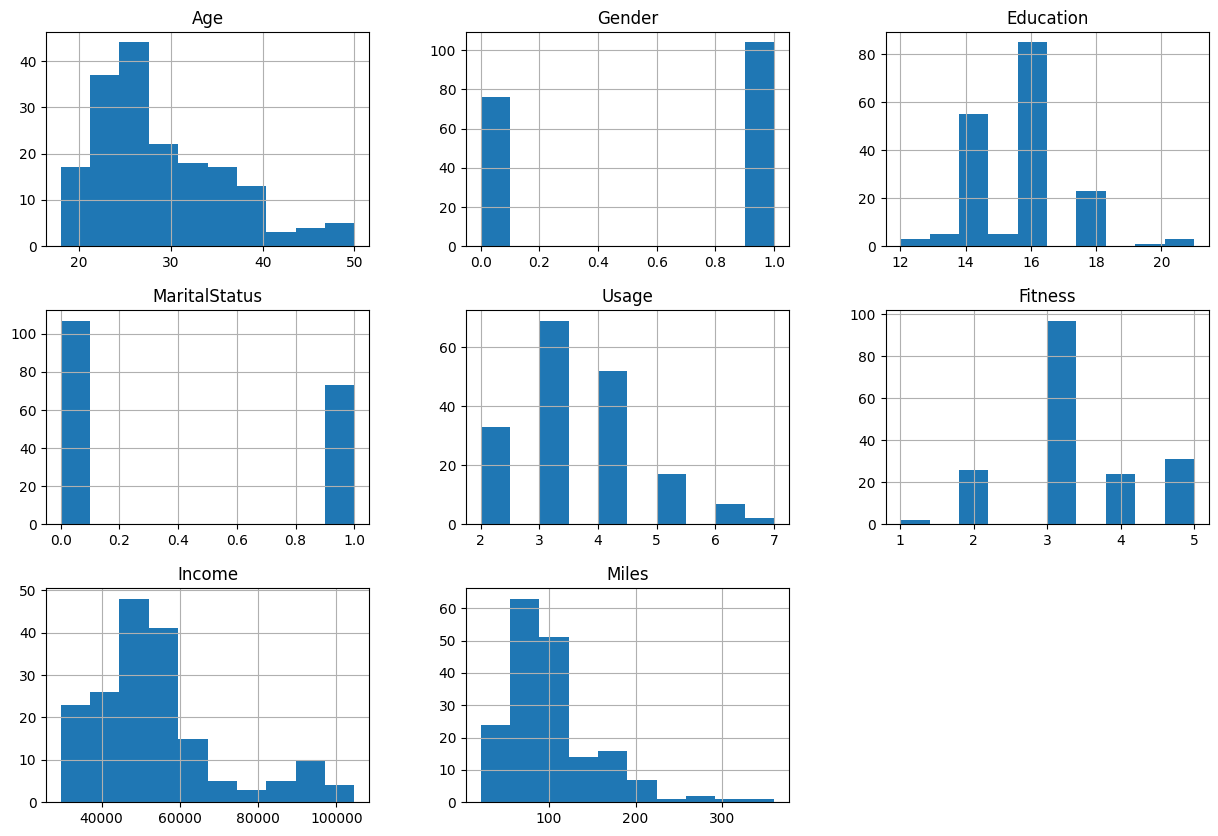

In [54]:
df.hist(figsize = (15,10))
plt.show()

### Density Plot

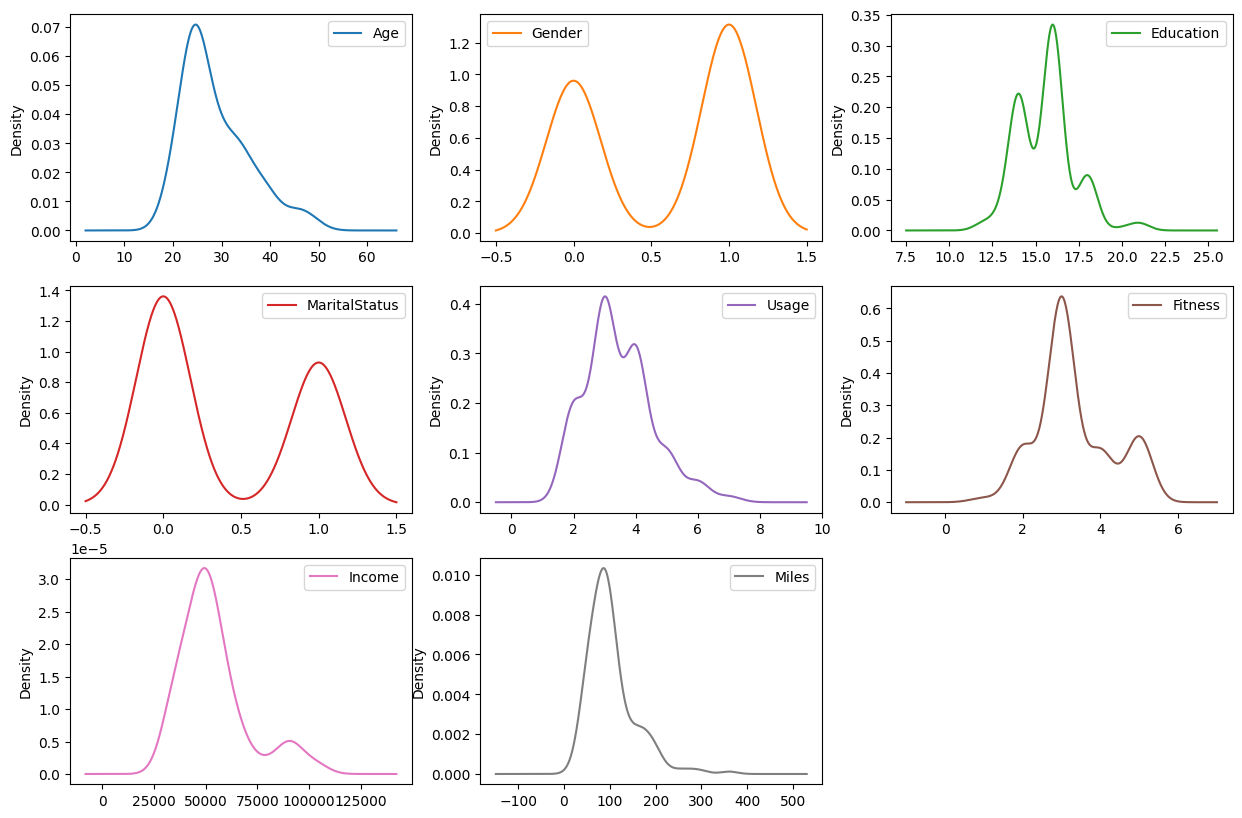

In [55]:
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

### Bloxplot

----
Verificado possíveis outliers.  

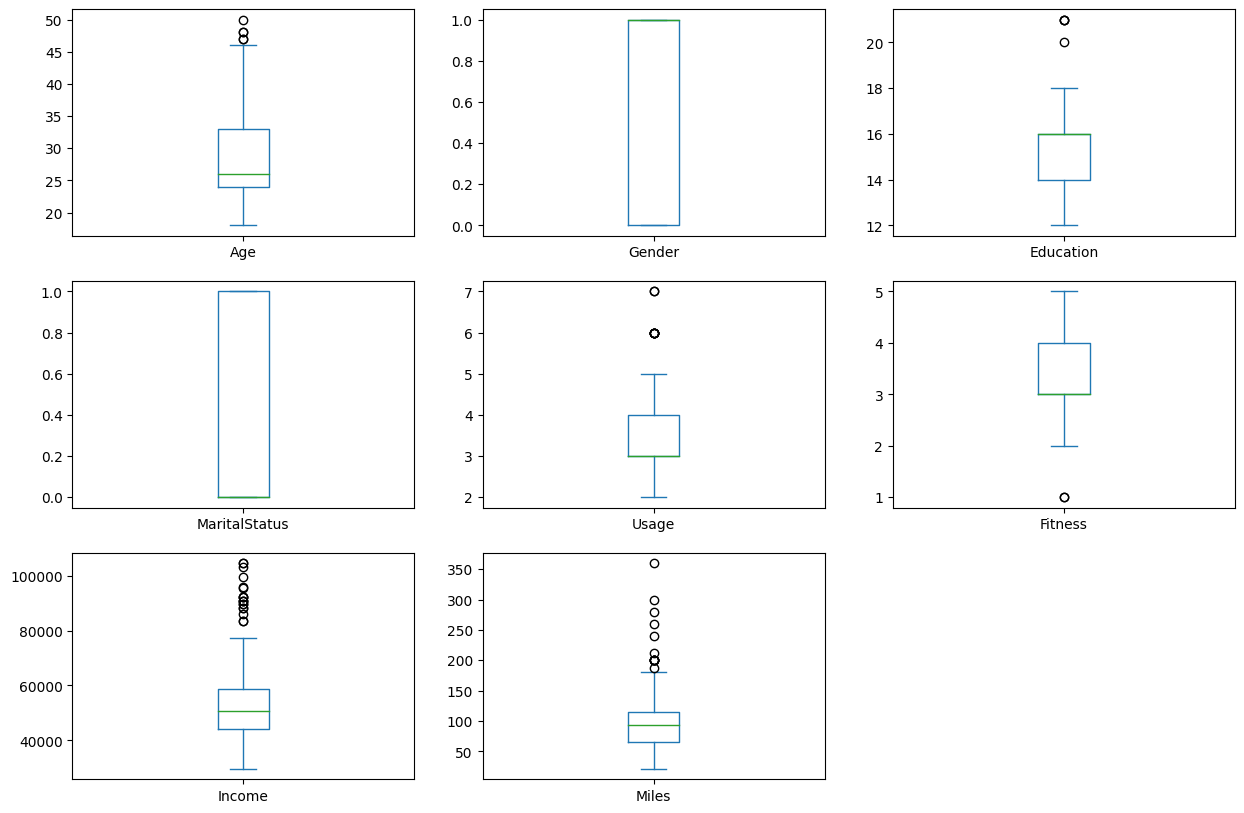

In [56]:
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### Matriz de correlação

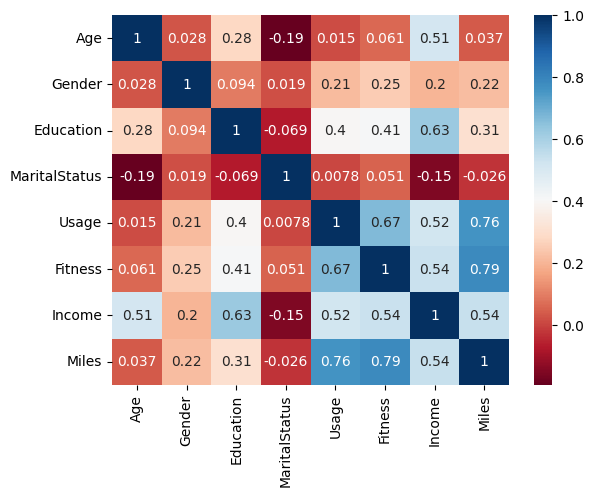

In [57]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

### Scatter Plot

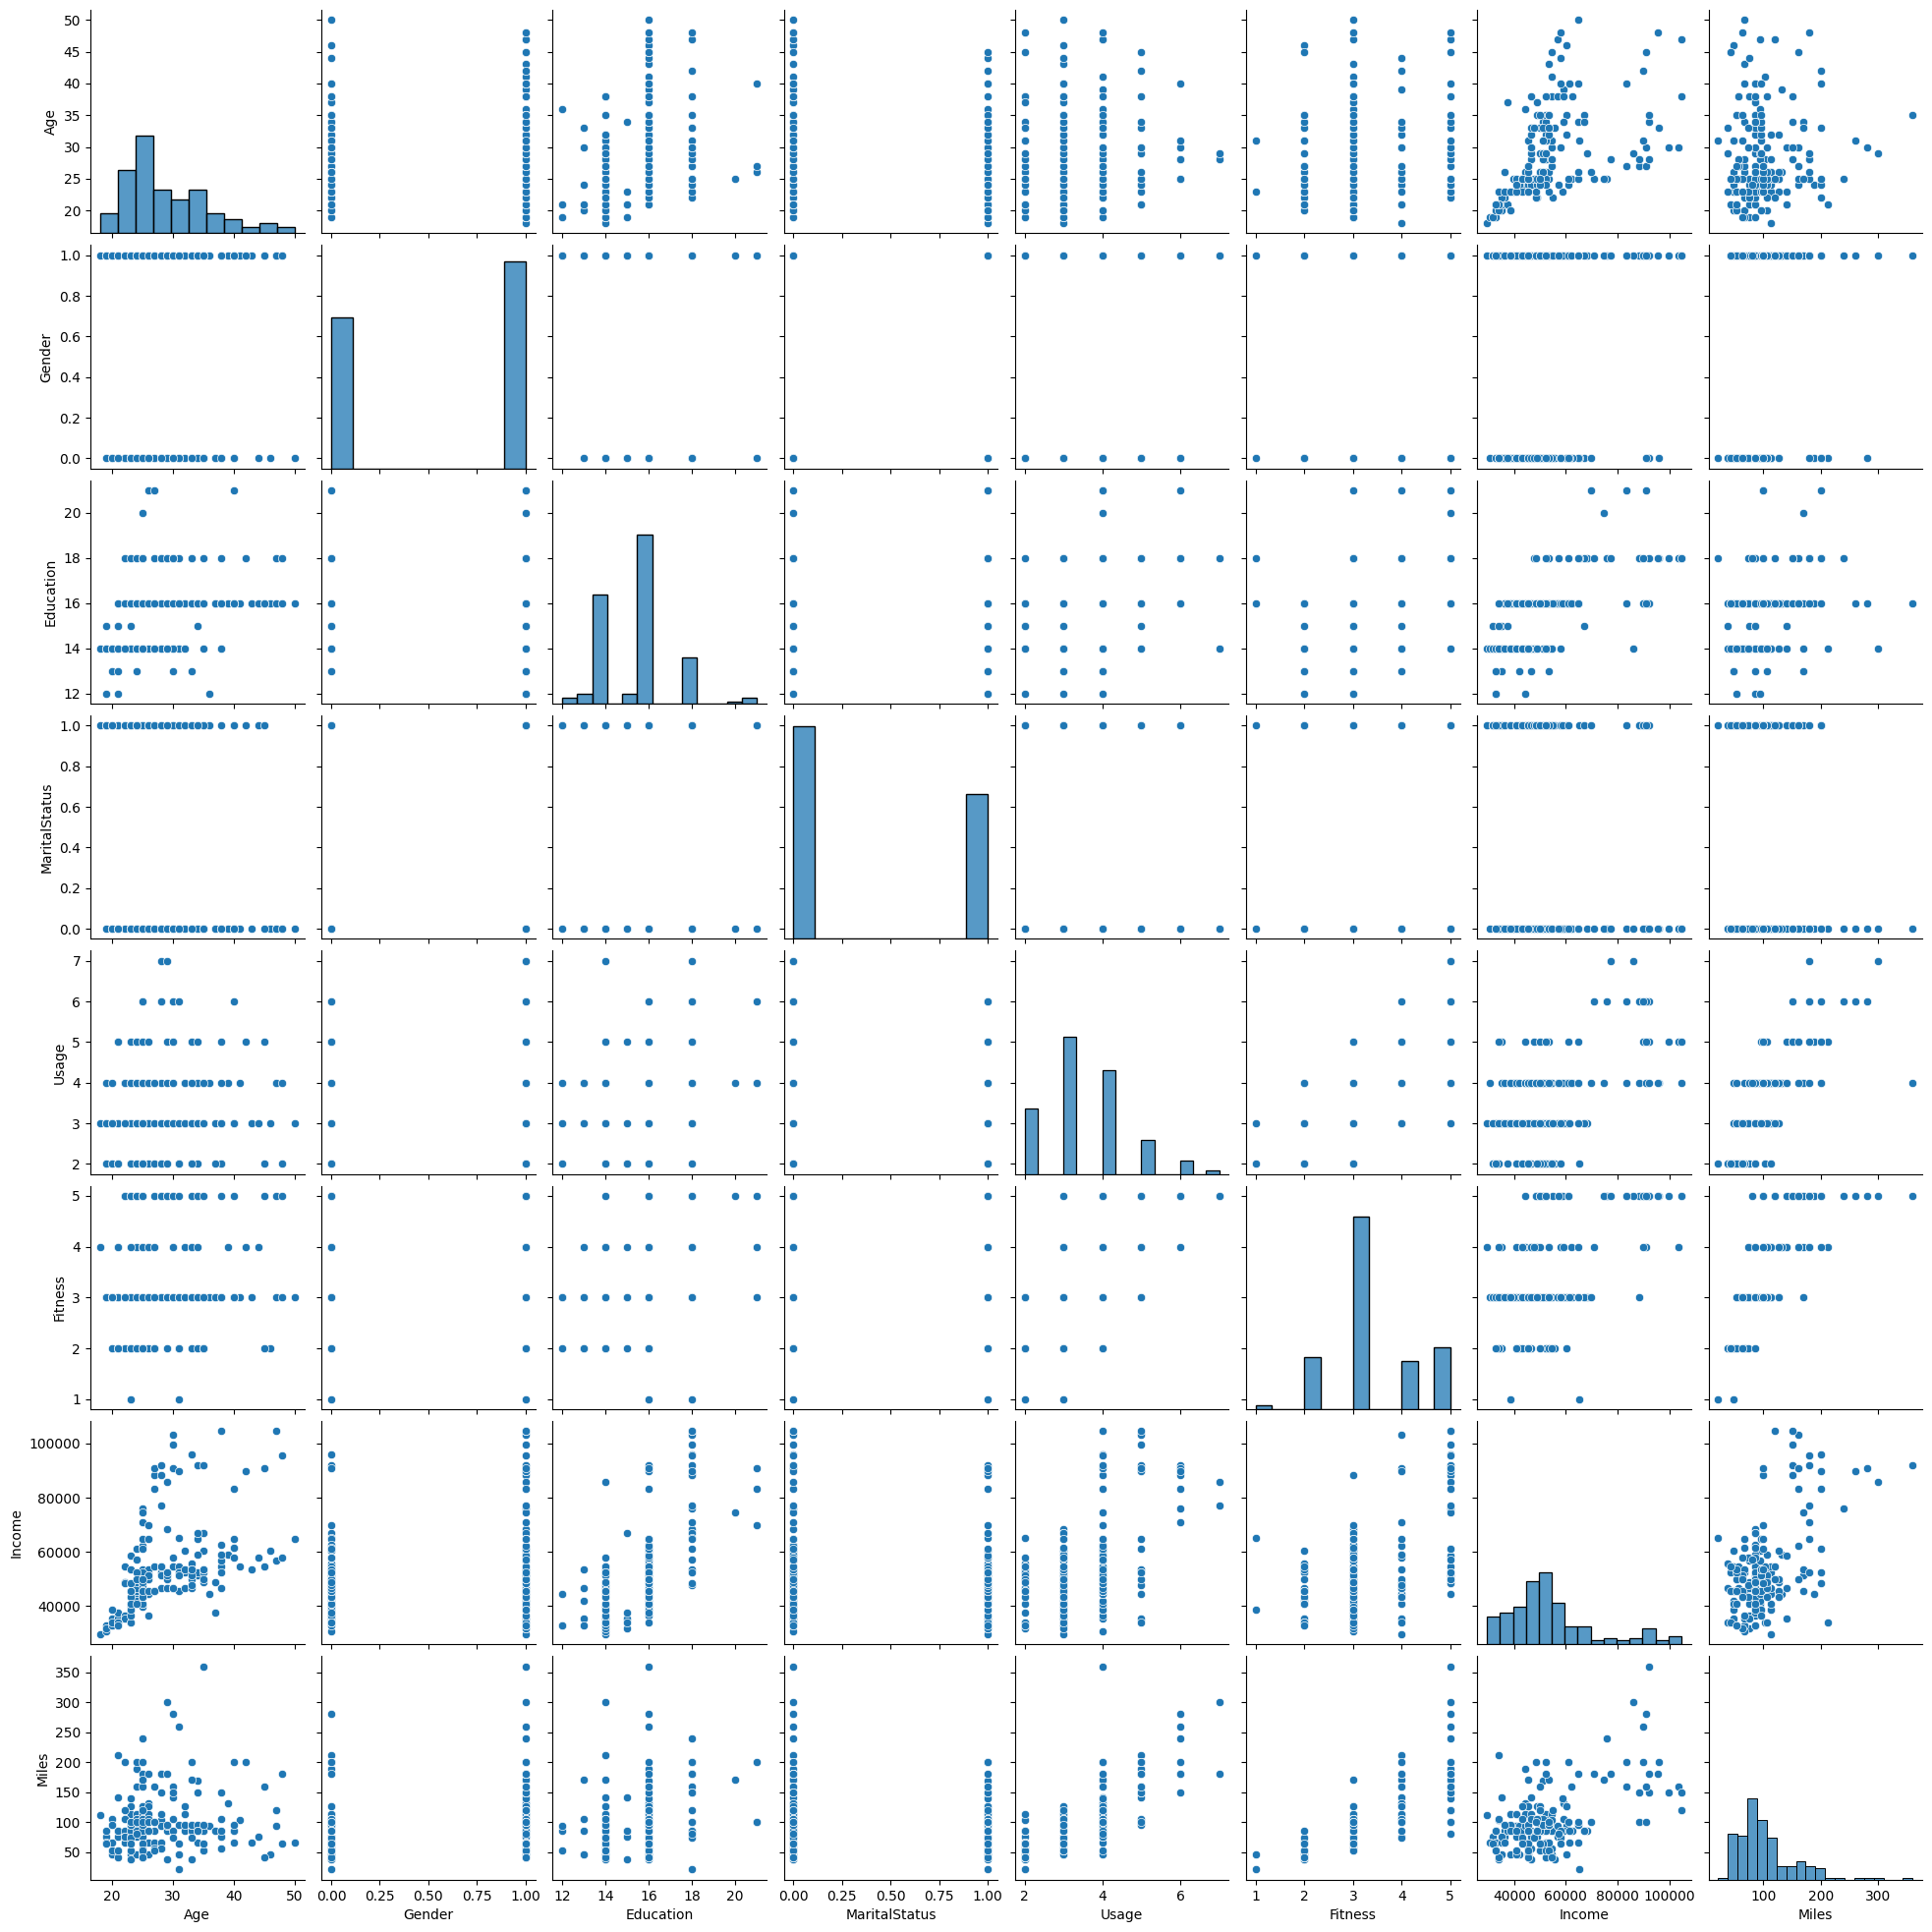

In [58]:
sns.pairplot(df)

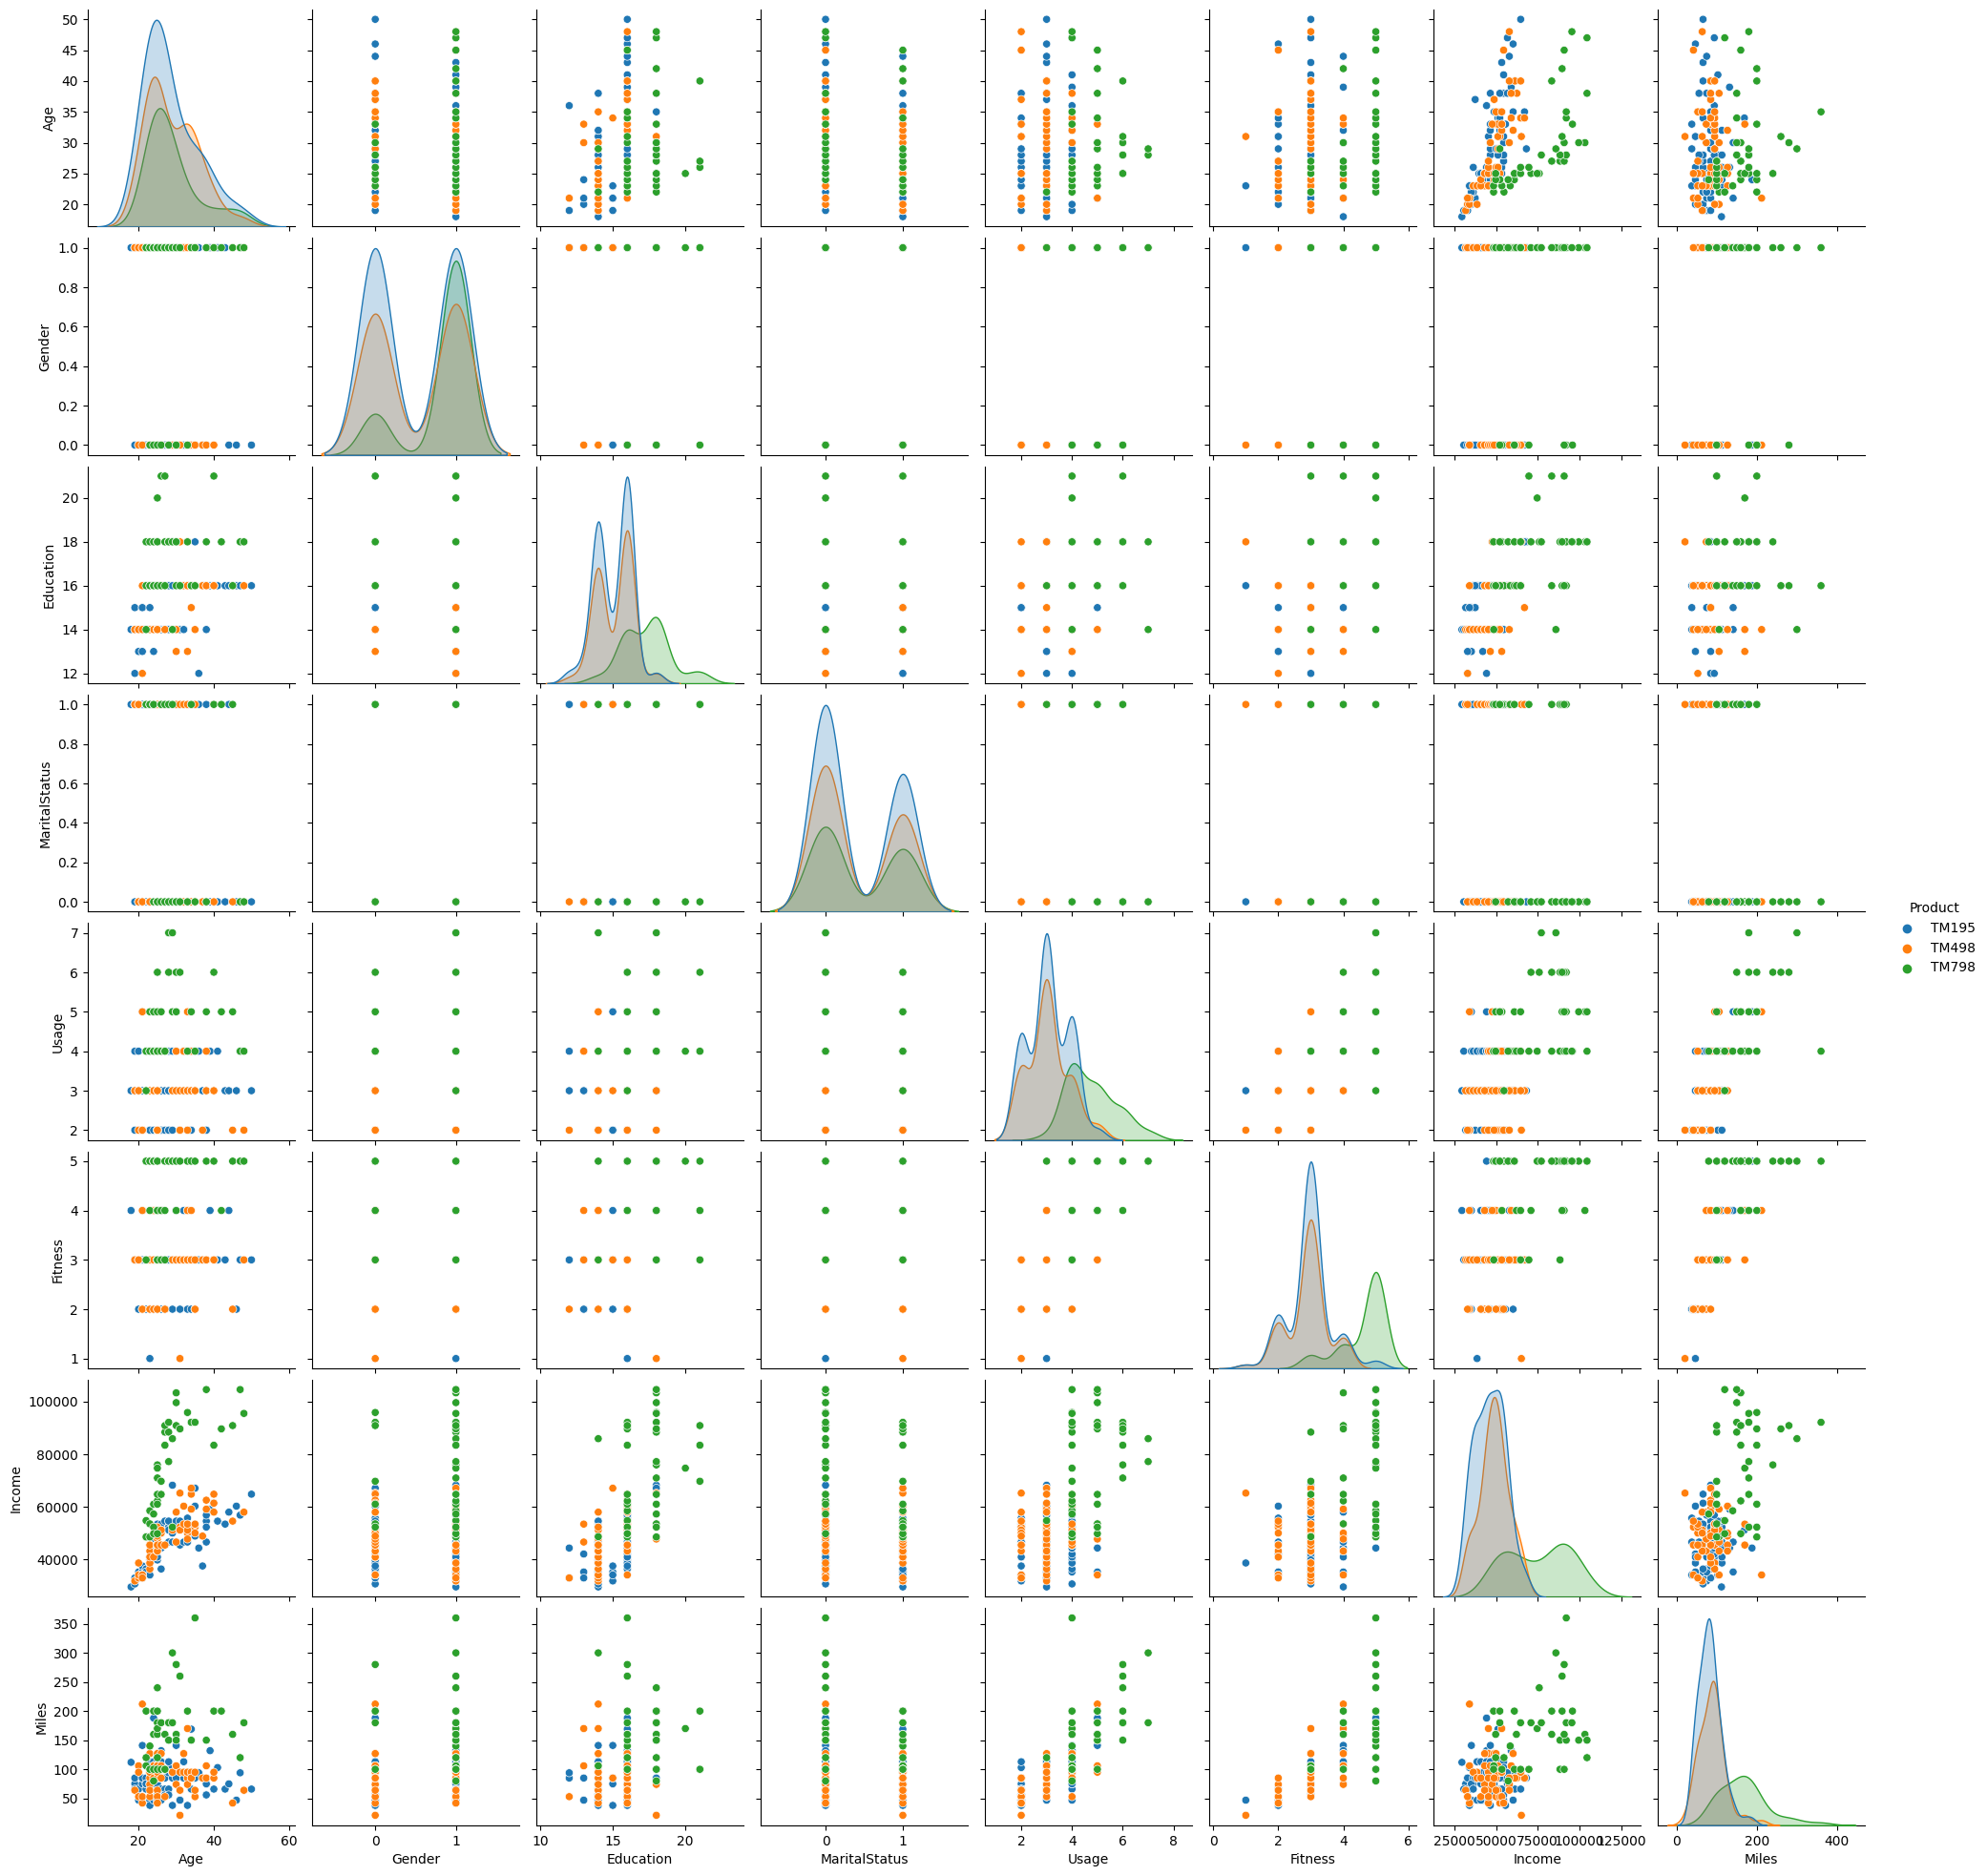

In [59]:
sns.pairplot(df, hue = "Product", height = 2.5);

<Axes: >

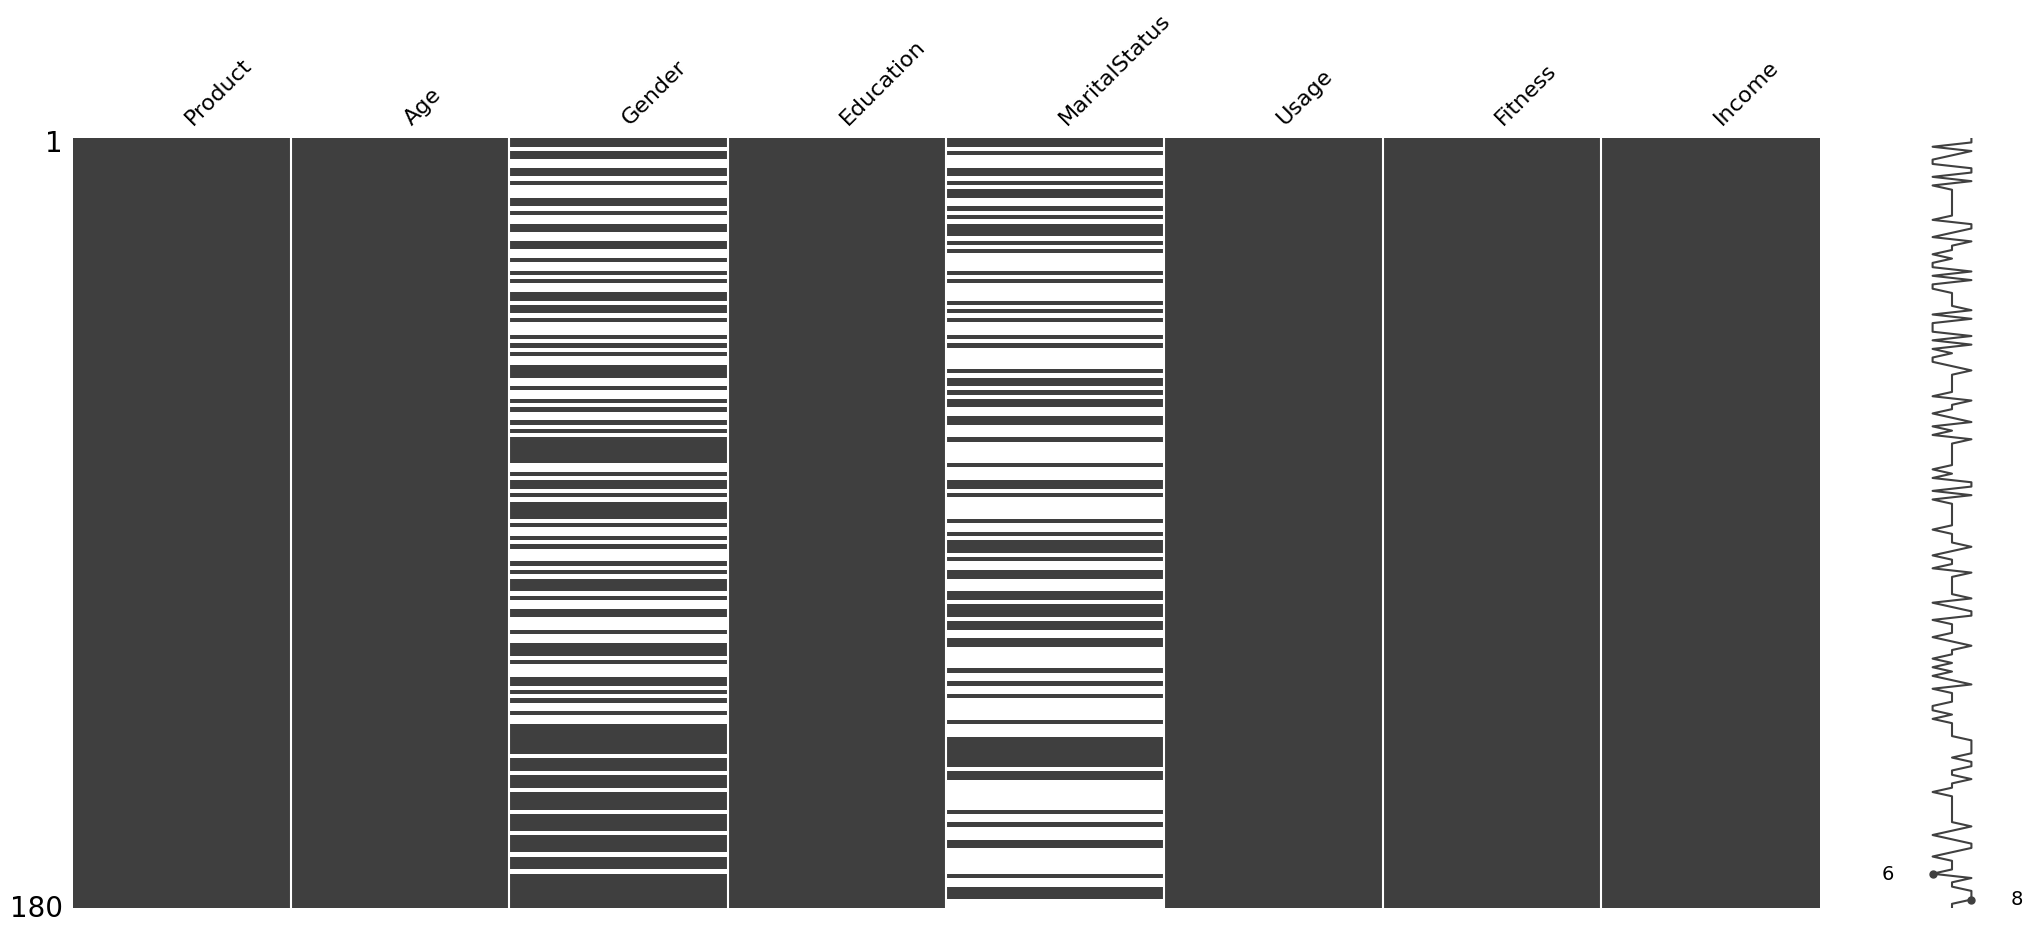

In [60]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

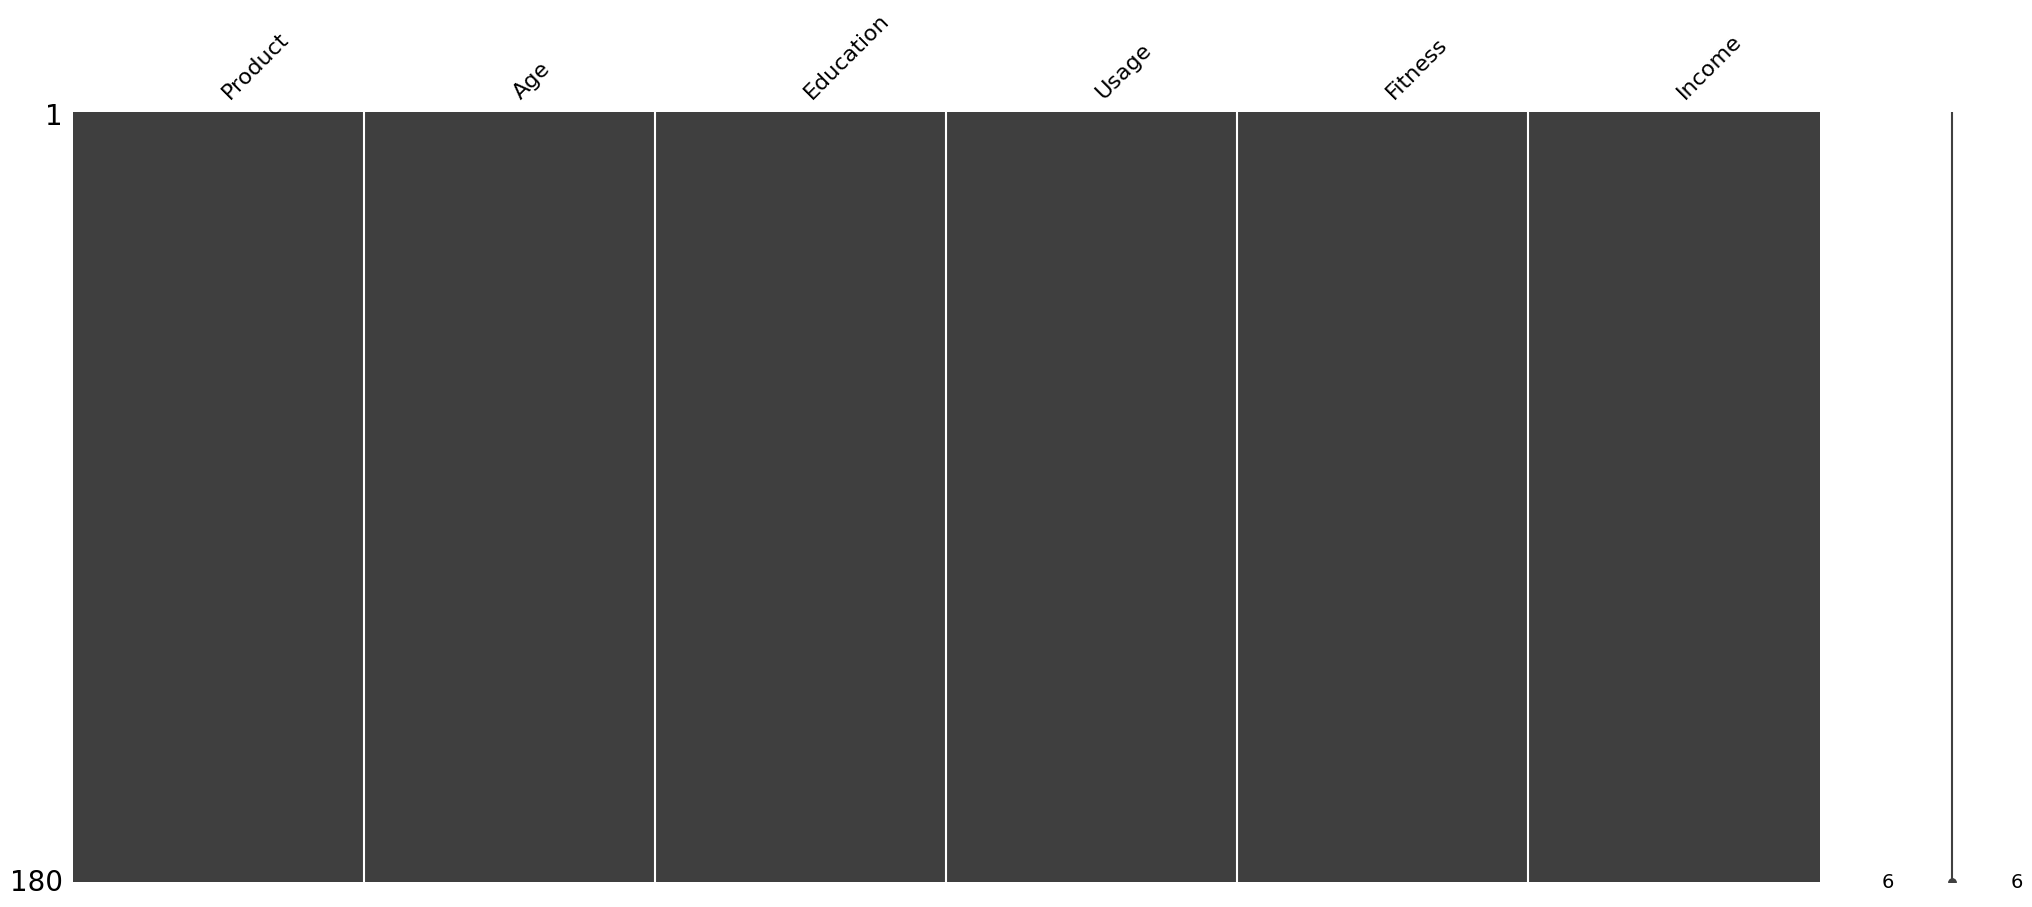

In [61]:
# removendo as colunas 'Gender' e 'MaritalStatus'
atributos.drop(['Gender', 'MaritalStatus'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [62]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['Product'] = df['Product']

# exibindo as primeiras linhas
datasetSemMissings.head()

,Product,Age,Education,Usage,Fitness,Income
0,TM195,18,14,3,4,29562
1,TM195,19,15,2,3,31836
2,TM195,19,14,4,3,30699
3,TM195,19,12,3,3,32973
4,TM195,20,13,4,2,35247


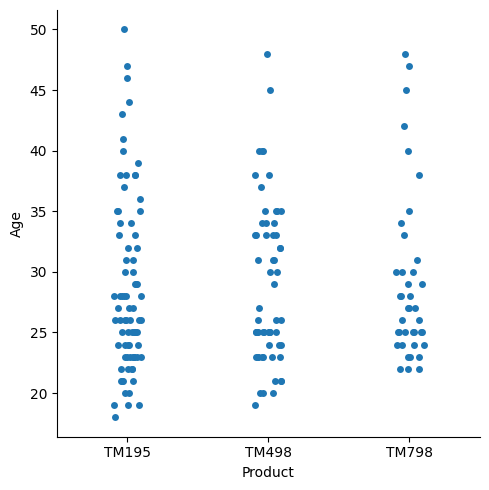

In [63]:
sns.catplot(x='Product', y='Age', data=df)

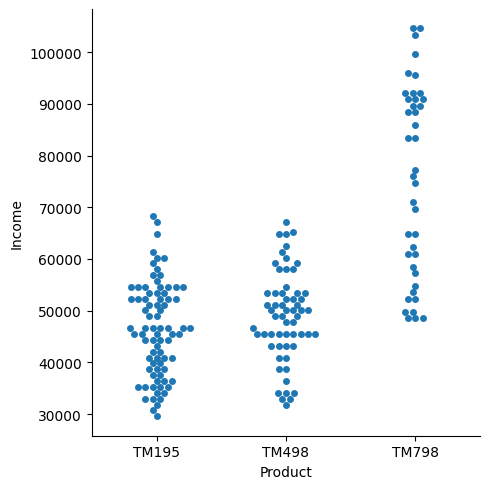

In [64]:
sns.catplot(x='Product', y='Income', kind = 'swarm', data=df)

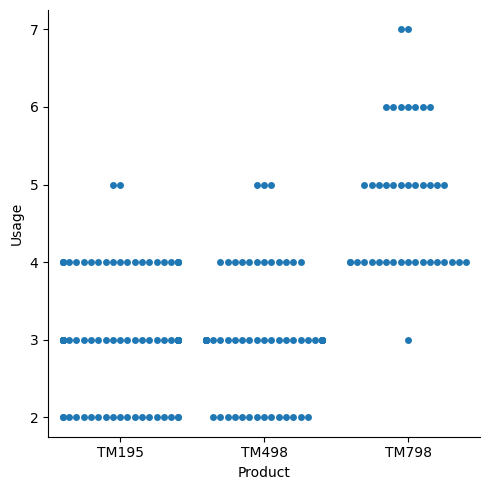

In [80]:
sns.catplot(x='Product', y='Usage', kind = 'swarm', data=df)

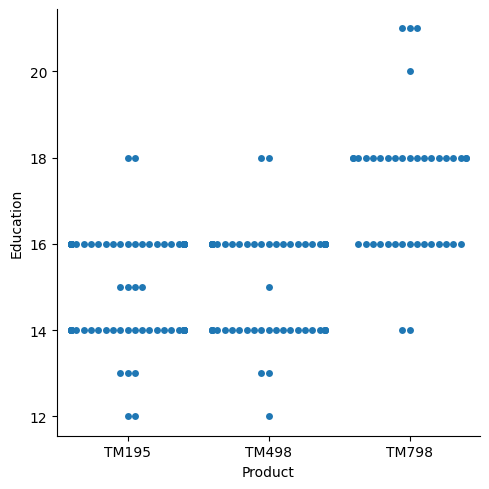

In [68]:
sns.catplot(x='Product', y='Education', kind = 'swarm', data=df)

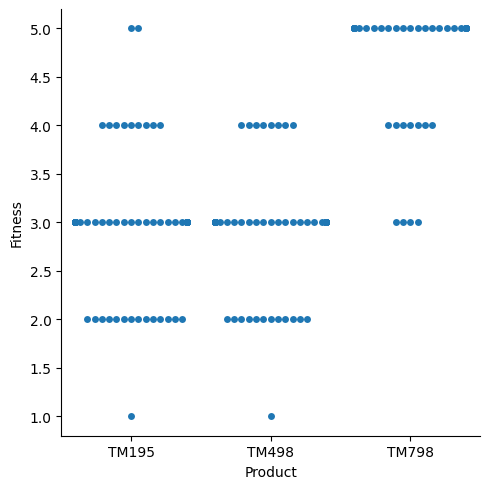

In [69]:
sns.catplot(x='Product', y='Fitness', kind = 'swarm', data=df)

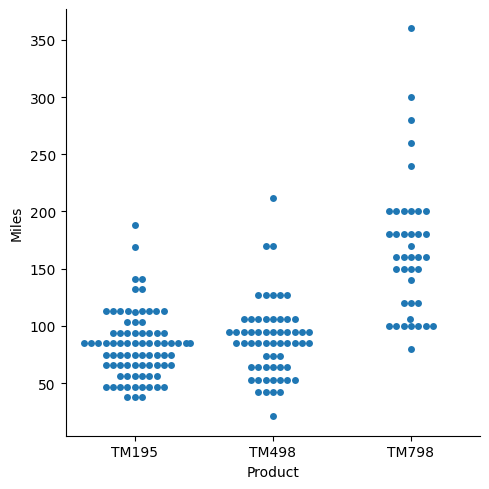

In [70]:
sns.catplot(x='Product', y='Miles', kind = 'swarm', data=df)

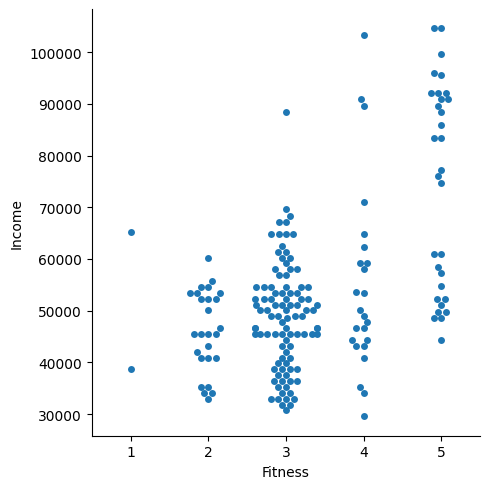

In [83]:
sns.catplot(x='Fitness', y='Income', kind = 'swarm', data=df)

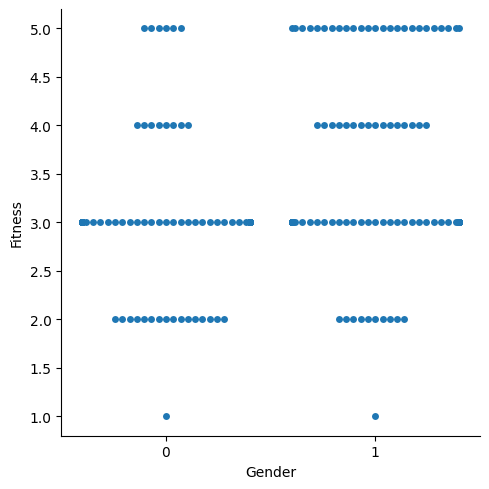

In [88]:
sns.catplot(x='Gender', y='Fitness', kind = 'swarm', data=df)

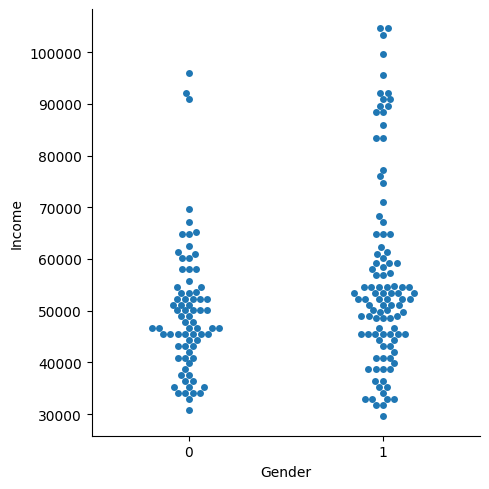

In [85]:
sns.catplot(x='Gender', y='Income', kind = 'swarm', data=df)

<Axes: xlabel='Product', ylabel='Age'>

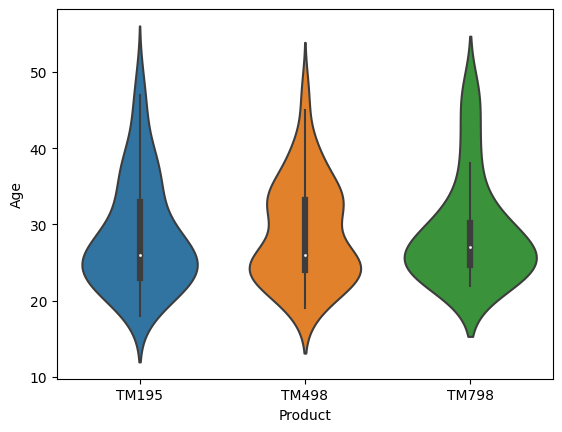

In [71]:
sns.violinplot(x='Product', y='Age', data=df)

<Axes: xlabel='Product', ylabel='Income'>

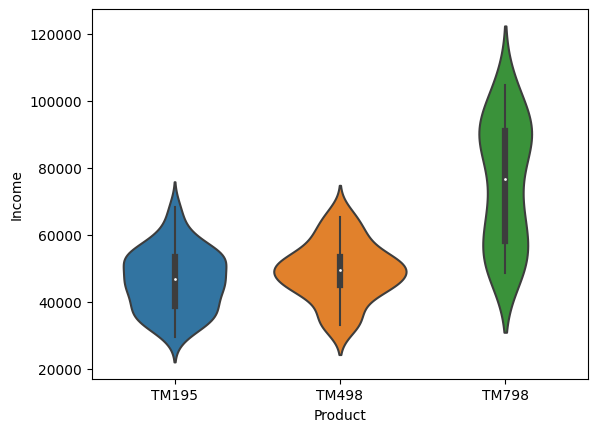

In [76]:
sns.violinplot(x='Product', y='Income', data=df)

<Axes: xlabel='Product', ylabel='Gender'>

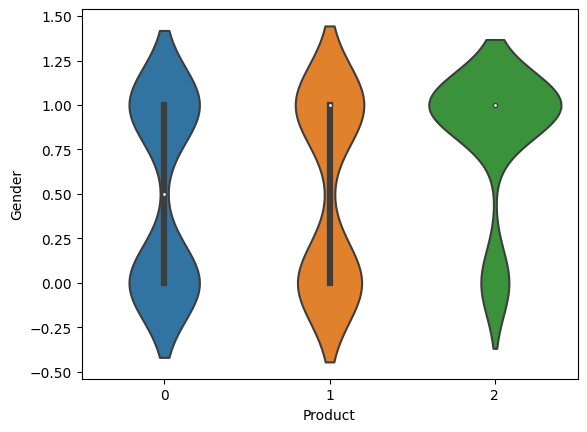

In [33]:
sns.violinplot(x='Product', y='Gender', data=df)

<Axes: xlabel='Product', ylabel='MaritalStatus'>

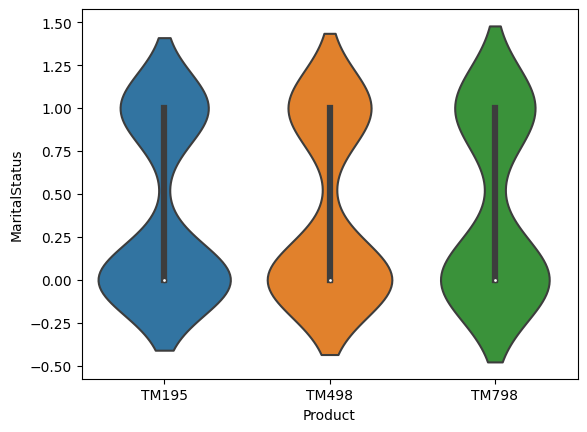

In [72]:
sns.violinplot(x='Product', y='MaritalStatus', data=df)

<Axes: xlabel='Product', ylabel='Usage'>

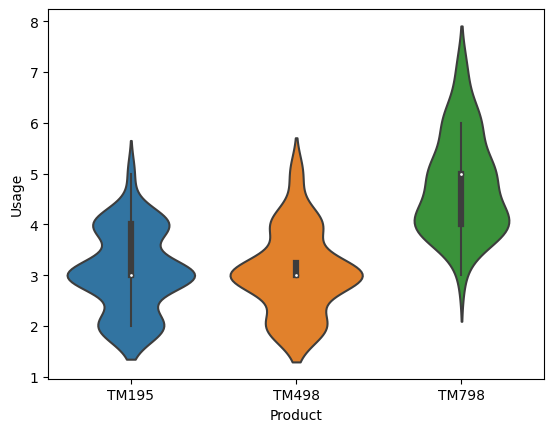

In [73]:
sns.violinplot(x='Product', y='Usage', data=df)

<Axes: xlabel='Product', ylabel='Education'>

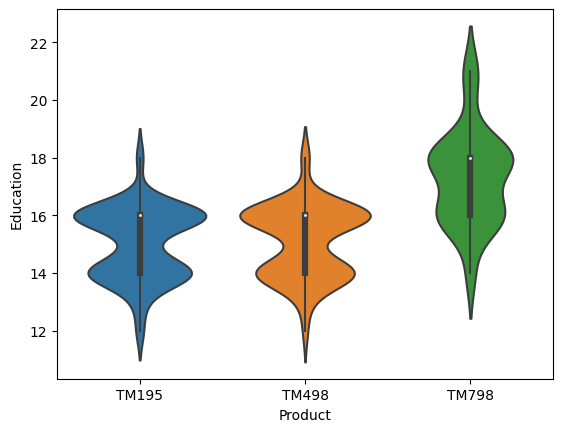

In [74]:
sns.violinplot(x='Product', y='Education', data=df)

<Axes: xlabel='Product', ylabel='Fitness'>

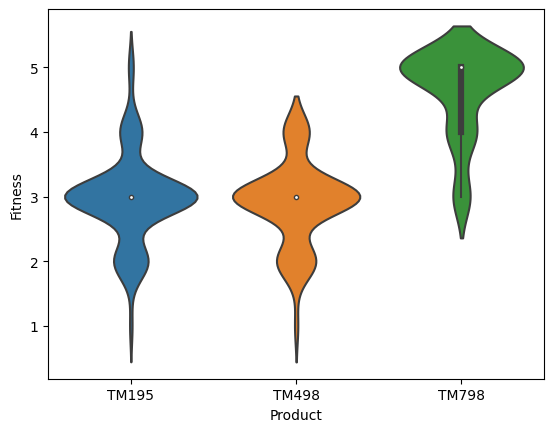

In [75]:
sns.violinplot(x='Product', y='Fitness', data=df)

<Axes: xlabel='Product', ylabel='Miles'>

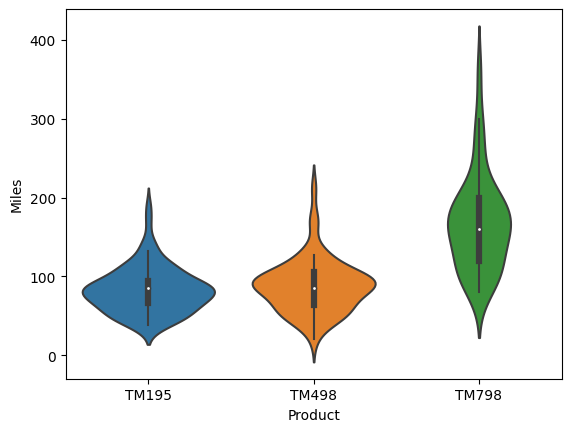

In [77]:
sns.violinplot(x='Product', y='Miles', data=df)

<Axes: xlabel='Fitness', ylabel='Income'>

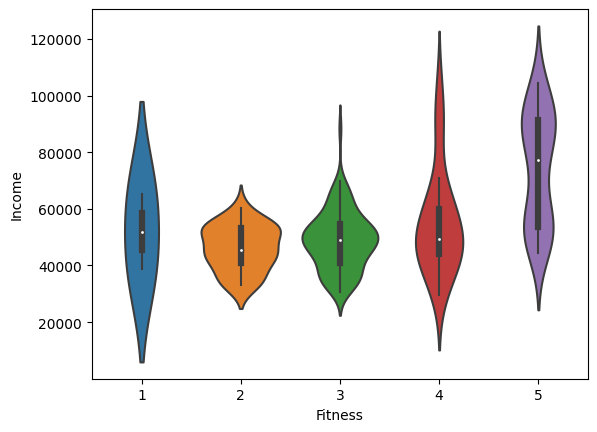

In [81]:
sns.violinplot(x='Fitness', y='Income', data=df)

<Axes: xlabel='Gender', ylabel='Income'>

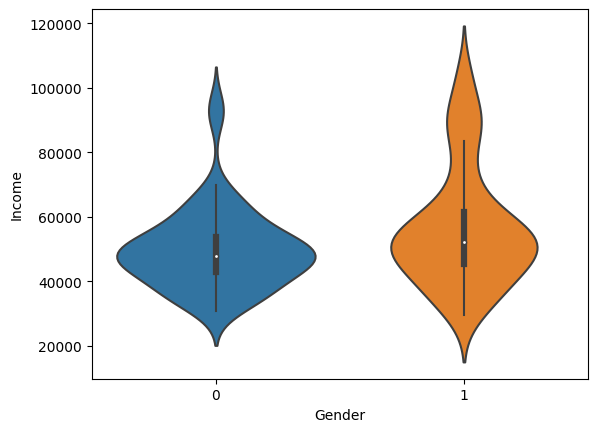

In [86]:
sns.violinplot(x='Gender', y='Income', data=df)

<Axes: xlabel='Gender', ylabel='Fitness'>

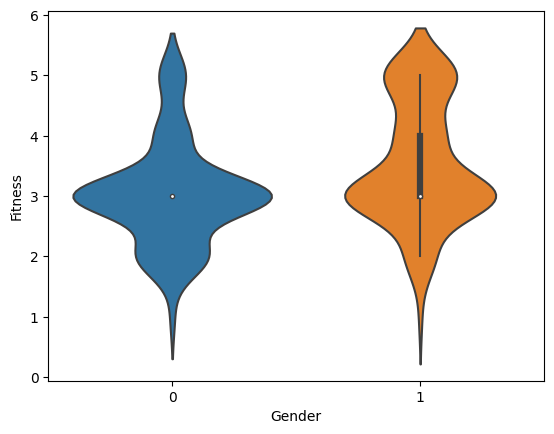

In [89]:
sns.violinplot(x='Gender', y='Fitness', data=df)